# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexszabo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [11]:
# Fetch the Bitcoin news articles
btc_news_articles = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)
print(f"Total articles about Bitcoin: {btc_news_articles['totalResults']}")

Total articles about Bitcoin: 9406


In [12]:
# Fetch the Ethereum news articles
eth_news_articles = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
)
print(f"Total articles about Ethereum: {eth_news_articles['totalResults']}")

Total articles about Ethereum: 4589


In [13]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Creating the pd df
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

In [14]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
eth_sentiments = []

for article in eth_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Creating the pd df
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

In [15]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020905,0.062800,0.066050,0.871150
std,0.373849,0.065173,0.057955,0.094478
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.037500,0.843500
50%,-0.114750,0.049000,0.063000,0.894000
75%,0.254725,0.085000,0.077000,0.930250
max,0.750600,0.202000,0.241000,0.964000


In [16]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.00000,20.000000
mean,-0.041355,0.05290,0.05690,0.890300
std,0.464782,0.07589,0.06113,0.068264
min,-0.765000,0.00000,0.00000,0.731000
25%,-0.334100,0.00000,0.00000,0.855250
50%,-0.249750,0.00000,0.06300,0.922500
75%,0.303775,0.07650,0.07550,0.937000
max,0.865500,0.26900,0.23300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with 0.062800

Q: Which coin had the highest compound score?

A: Ethereum with 0.865500

Q. Which coin had the highest positive score?

A: Ethereum with 0.26900

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [34]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

stopwords = stopwords.union({
    'crypto',
    'cryptocurrency',
    'cryptocurrencies',
})

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    if type(text) == list:
        text = ' '.join(text)
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in stopwords]
    return tokens

In [38]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, space, od..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegasst..."


In [39]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, company, ha, apologised..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, ha, promised, better, ..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [50]:
from collections import Counter
from nltk import ngrams

In [51]:
# creating a corpus function
def get_words(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenize(corpus_string)
    words = Counter(processed)
    output = [word.lower() for word in words if word.lower() not in stopwords]
    return output

In [52]:
# creating a bigrams function
def get_bigrams(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenizer(corpus_string)
    bigrams = ngrams(processed, n=2)
    bigrams_list = Counter(bigrams)
    return bigrams_list

In [53]:
# creating a function to grab the n most freqent tokens fon a list of tokens
def top_tokens(tokens, ngrams=False, N=10):
    top_10 = dict(Counter(tokens).most_common(N))
    columns = ['word', 'count'] if ngrams == False else ['bigram', 'count']
    return pd.DataFrame(list(top_10.items()), columns=columns)

In [67]:
# Creating a btc corpus
btc_corpus = [article['content'] for article in btc_news_articles['articles']]
# Generate the Bitcoin N-grams where N=2
btc_bigrams = get_bigrams(btc_corpus)
top_tokens(btc_bigrams)

,word,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(may, reuters)",4
6,"(char, may)",3
7,"(b, char)",2
8,"(world, largest)",2
9,"(interest, rate)",2


In [68]:
# Creating a eth corpus
eth_corpus = [article['content'] for article in eth_news_articles['articles']]
# Generate the Ethereum N-grams where N=2
eth_bigrams = get_bigrams(eth_corpus)
top_tokens(eth_bigrams)

,word,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(char, may)",3
6,"(may, reuters)",3
7,"(yacht, club)",2
8,"(char, april)",2
9,"(april, reuters)",2


In [70]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_words = tokenizer(btc_corpus)
token_count(btc_top_words)

,word,count
0,char,19
1,bitcoin,13
2,world,8
3,ha,7
4,reuters,6
5,week,5
6,april,4
7,investor,4
8,dropped,4
9,previous,4


In [71]:
# Use token_count to get the top 10 words for Ethereum
eth_top_words = tokenizer(eth_corpus)
token_count(eth_top_words)

,word,count
0,char,20
1,bitcoin,7
2,ha,6
3,world,6
4,ethereum,5
5,biggest,5
6,reuters,5
7,last,5
8,may,5
9,week,5


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

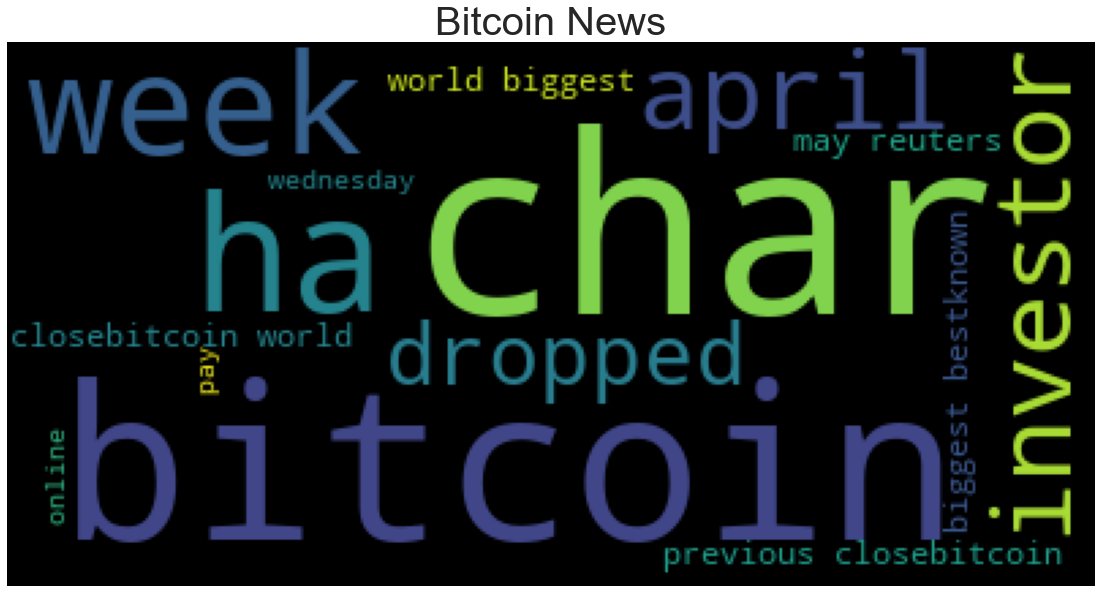

In [85]:
# Generate the Bitcoin word cloud
btc_tokens = tokenizer(btc_corpus)
btc_wc = WordCloud(max_words=15).generate(' '.join(btc_tokens))
plt.title('Bitcoin News', fontdict={'fontsize': 40})
plt.axis('off')
plt.imshow(btc_wc)

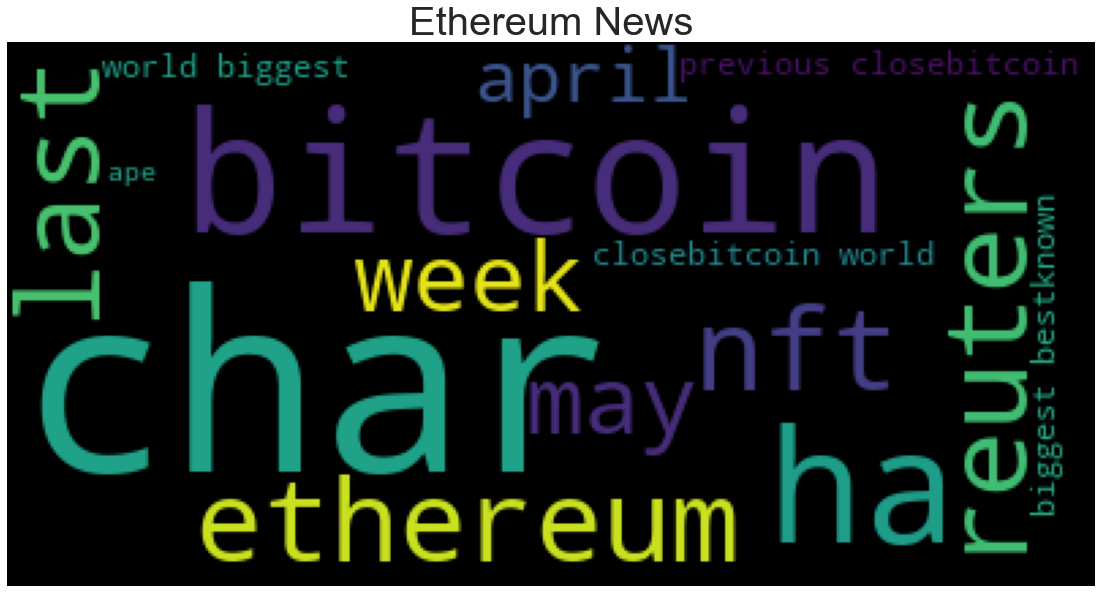

In [86]:
# Generate the Ethereum word cloud
eth_tokens = tokenizer(eth_corpus)
eth_wc = WordCloud(max_words=15).generate(' '.join(eth_tokens))
plt.title('Ethereum News', fontdict={'fontsize': 40})
plt.axis('off')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [87]:
import spacy
from nltk.corpus import reuters
from spacy import displacy

In [88]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [89]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [97]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_corpus).replace('\n', '')
btc_text[:200]

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B…'

In [98]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [100]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [101]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images\r  ', 'Warren Buffett', 'the weekend', 'Getty Images\r', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'Last week', 'Fidelity Investments', 'the US Treasury', 'last July', '33,000', 'the week', 'last week', 'Fed', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'May 10', 'Reuters', 'The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'Touadera', 'Sam Bankman-Fried', 'the digital asset exchange', 'FTX', 'El Salvador', 'first', 'September

---

### Ethereum NER

In [103]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_corpus).replace('\n', '')
eth_text[:200]

"Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle…"

In [106]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [107]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [108]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', '+6669', 'April 26', 'Reuters', 'No.2', 'second', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'Early this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', '47,454', '34,007', '28%.About a third', 'this week', 'Nvidia', 'Ampere Lite Hash Rate', 'LHR', 'Ethereum', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'NFT', 'Ethereum', 'Last week', '9', '8', 'Nvidia', 'LHR', 'last year\xa0', 'last July', '33,000', 'the week', 'last week', 'Fed', 'ApeCoin', '16%', 'Monday', '14.60', 'Transform 2022', 'Ju

---